In [1]:
# Step 1: Import necessary libraries and load data
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the JSON data
with open('C:/Uni/introb/metrics_data.json', 'r') as file:
    data = json.load(file)

# Convert to DataFrame for easier analysis
flattened_data = []
for map_type, algorithms in data.items():
    for algo, metrics in algorithms.items():
        metrics['map_type'] = map_type
        metrics['algorithm'] = algo
        flattened_data.append(metrics)
        
df = pd.DataFrame(flattened_data)

In [2]:
# Step 2: Basic Statistics Overview
print("Overall Algorithm Performance Summary:")
print("\nSuccess Rate by Algorithm:")
success_stats = df.groupby('algorithm')[['successful_runs', 'total_runs']].mean()
success_stats['success_rate'] = (success_stats['successful_runs'] / success_stats['total_runs']) * 100
print(success_stats.sort_values('success_rate', ascending=False))

print("\nAverage Scores Across All Maps:")
print(df.groupby('algorithm')['avg_score'].mean().sort_values(ascending=False))

Overall Algorithm Performance Summary:

Success Rate by Algorithm:
           successful_runs  total_runs  success_rate
algorithm                                           
ASTAR                 1.00         1.0         100.0
BFS                   1.00         1.0         100.0
DIJKSTRA              1.00         1.0         100.0
GBFS                  1.00         1.0         100.0
QL                    0.75         1.0          75.0
SARSA                 0.50         1.0          50.0

Average Scores Across All Maps:
algorithm
DIJKSTRA    170.25
BFS         169.75
ASTAR       167.75
GBFS        160.50
QL          123.00
SARSA        84.25
Name: avg_score, dtype: float64


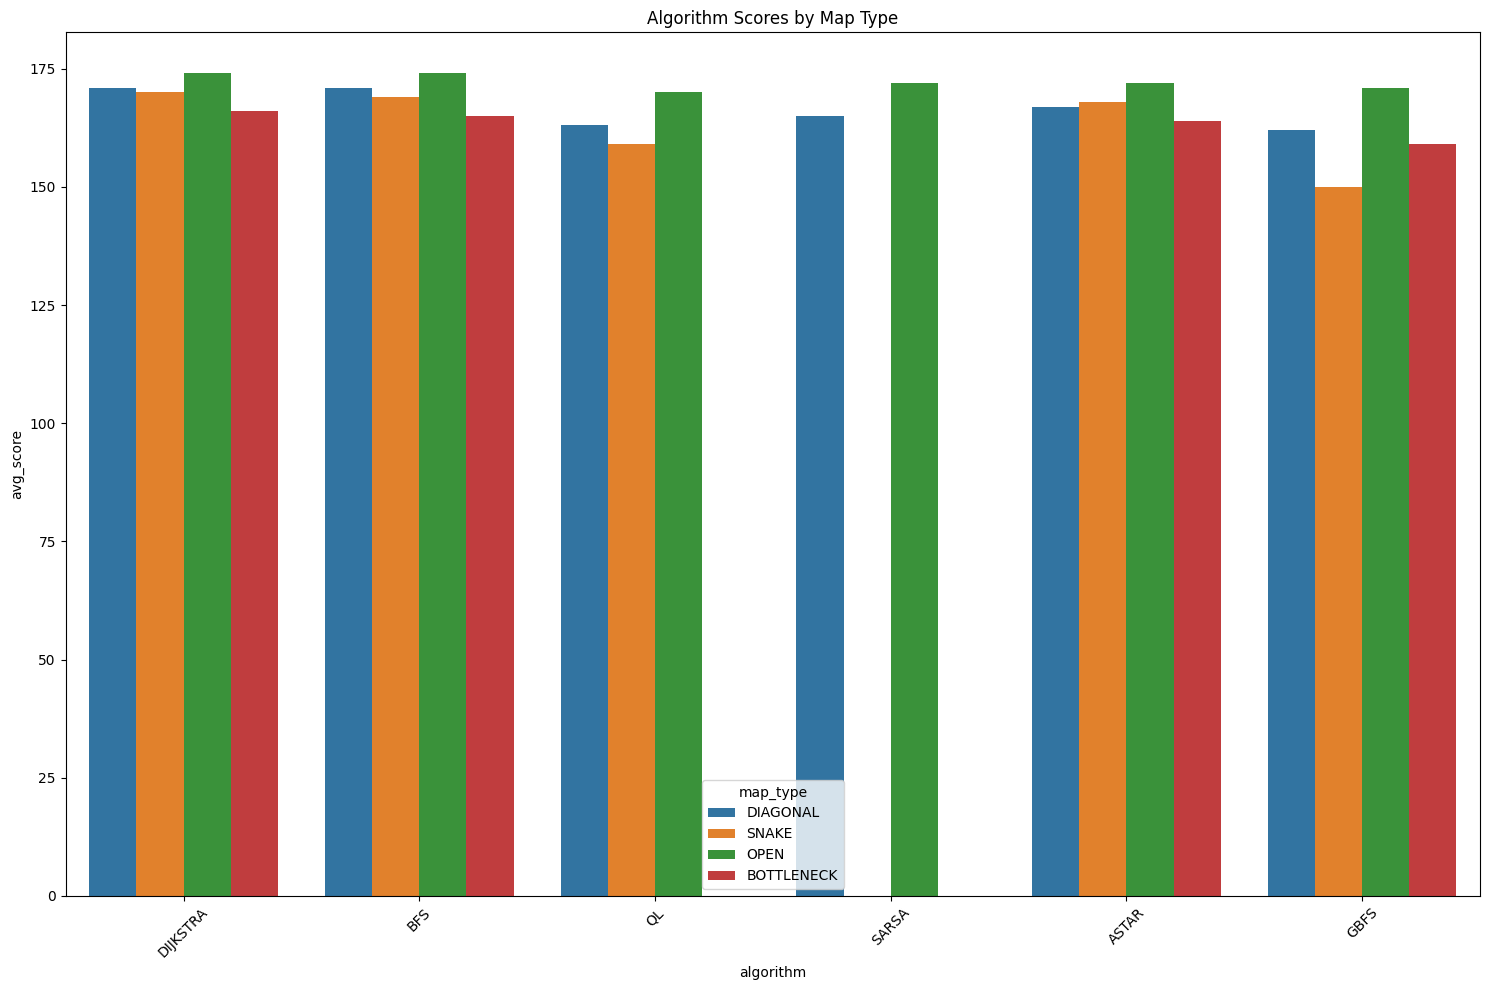


Analysis for DIAGONAL map:

Top performing algorithms by score:
  algorithm  avg_score
0  DIJKSTRA      171.0
1       BFS      171.0
4     ASTAR      167.0
3     SARSA      165.0
2        QL      163.0

Fastest algorithms (completion time):
  algorithm  avg_completion_time
1       BFS            13.117019
0  DIJKSTRA            14.117016
4     ASTAR            14.754542
3     SARSA            15.729273
2        QL            17.634848

Analysis for SNAKE map:

Top performing algorithms by score:
   algorithm  avg_score
7   DIJKSTRA      170.0
9        BFS      169.0
6      ASTAR      168.0
10        QL      159.0
8       GBFS      150.0

Fastest algorithms (completion time):
   algorithm  avg_completion_time
11     SARSA             0.000000
9        BFS            15.167180
6      ASTAR            15.521379
7   DIJKSTRA            15.746251
10        QL            21.279130

Analysis for OPEN map:

Top performing algorithms by score:
   algorithm  avg_score
13  DIJKSTRA      174.0
15

In [3]:
# Step 3: Performance Analysis by Map Type
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x='algorithm', y='avg_score', hue='map_type')
plt.title('Algorithm Scores by Map Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Detailed map-type analysis
for map_type in df['map_type'].unique():
    map_data = df[df['map_type'] == map_type]
    print(f"\nAnalysis for {map_type} map:")
    print("\nTop performing algorithms by score:")
    print(map_data.sort_values('avg_score', ascending=False)[['algorithm', 'avg_score']].head())
    print("\nFastest algorithms (completion time):")
    print(map_data.sort_values('avg_completion_time')[['algorithm', 'avg_completion_time']].head())

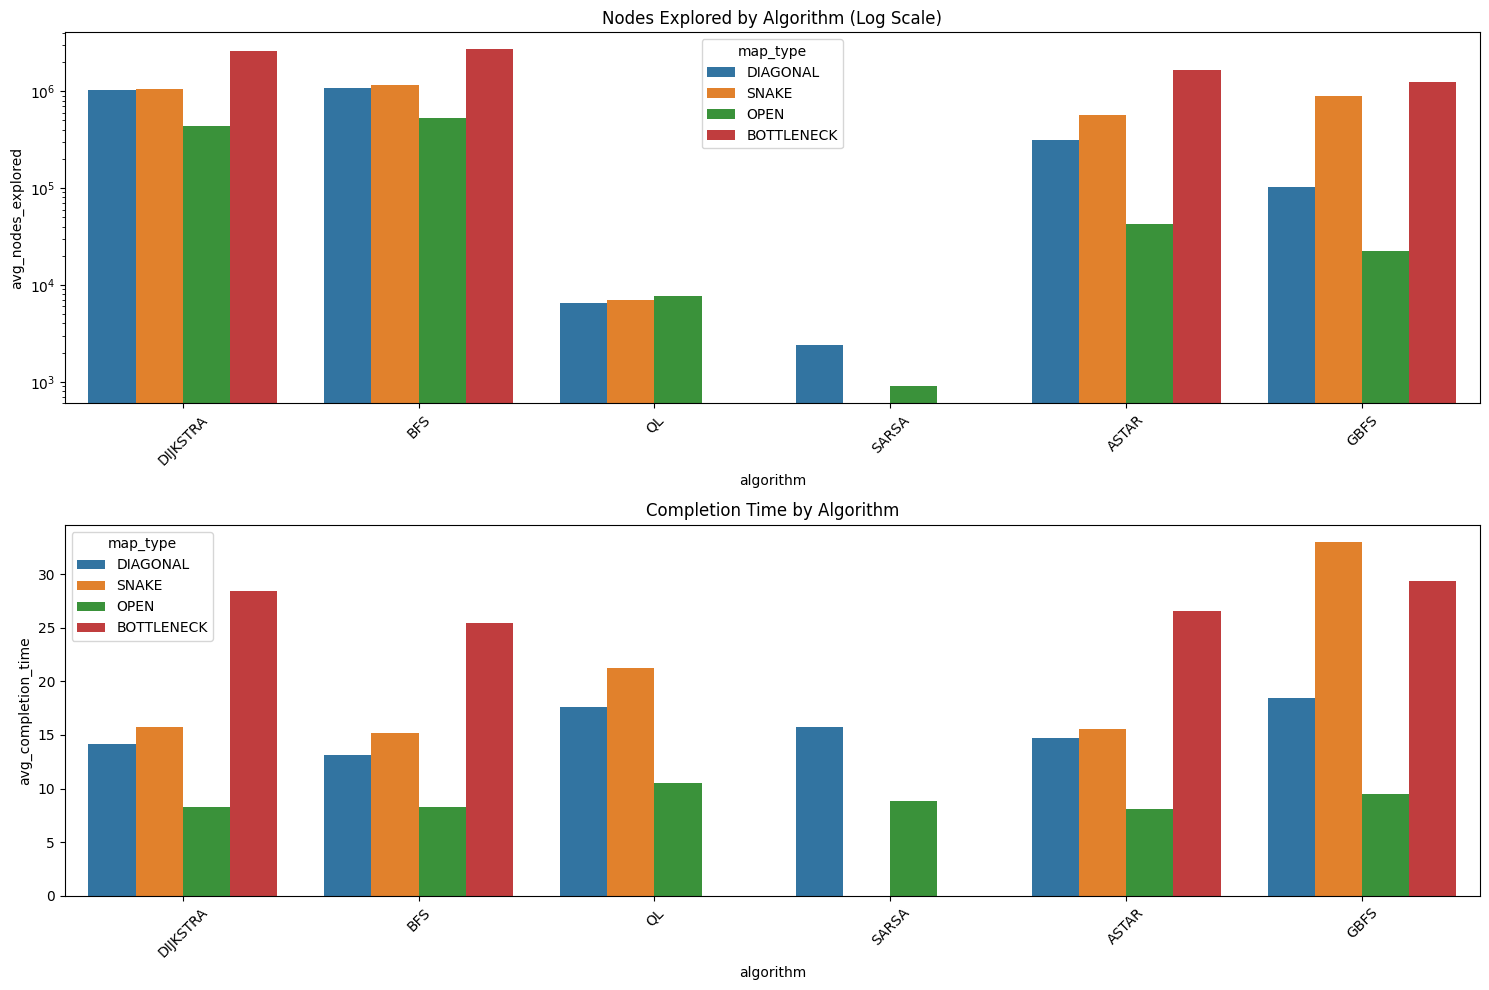


Efficiency Ratio (Score/Time) by Algorithm:
algorithm
SARSA       14.925892
BFS         12.942902
DIJKSTRA    12.442727
ASTAR       12.404404
QL          10.946975
GBFS         9.205738
Name: efficiency_ratio, dtype: float64


In [4]:
# Step 4: Efficiency Analysis
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.barplot(data=df, x='algorithm', y='avg_nodes_explored', hue='map_type')
plt.yscale('log')
plt.title('Nodes Explored by Algorithm (Log Scale)')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
sns.barplot(data=df, x='algorithm', y='avg_completion_time', hue='map_type')
plt.title('Completion Time by Algorithm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate efficiency metrics
df['efficiency_ratio'] = df['avg_score'] / df['avg_completion_time']
print("\nEfficiency Ratio (Score/Time) by Algorithm:")
print(df.groupby('algorithm')['efficiency_ratio'].mean().sort_values(ascending=False))

In [5]:
# Step 5: Algorithm-Specific Analysis
for algorithm in df['algorithm'].unique():
    algo_data = df[df['algorithm'] == algorithm]
    print(f"\n{'='*50}")
    print(f"Detailed Analysis for {algorithm}")
    print(f"{'='*50}")

    print("\nPerformance across different maps:")
    print(algo_data[['map_type', 'avg_score', 'avg_completion_time', 'avg_nodes_explored']])

    print(f"\nStrengths:")
    # High scores
    if algo_data['avg_score'].mean() > df['avg_score'].mean():
        print("- Above average scores")
    # Fast completion
    if algo_data['avg_completion_time'].mean() < df['avg_completion_time'].mean():
        print("- Faster than average completion time")
    # Efficient exploration
    if algo_data['avg_nodes_explored'].mean() < df['avg_nodes_explored'].mean():
        print("- Efficient in node exploration")

    print(f"\nWeaknesses:")
    # Low scores
    if algo_data['avg_score'].mean() < df['avg_score'].mean():
        print("- Below average scores")
    # Slow completion
    if algo_data['avg_completion_time'].mean() > df['avg_completion_time'].mean():
        print("- Slower than average completion time")
    # Inefficient exploration
    if algo_data['avg_nodes_explored'].mean() > df['avg_nodes_explored'].mean():
        print("- High number of nodes explored")


Detailed Analysis for DIJKSTRA

Performance across different maps:
      map_type  avg_score  avg_completion_time  avg_nodes_explored
0     DIAGONAL      171.0            14.117016           1017534.0
7        SNAKE      170.0            15.746251           1057967.0
13        OPEN      174.0             8.274731            434344.0
19  BOTTLENECK      166.0            28.455001           2608116.0

Strengths:
- Above average scores

Weaknesses:
- Slower than average completion time
- High number of nodes explored

Detailed Analysis for BFS

Performance across different maps:
      map_type  avg_score  avg_completion_time  avg_nodes_explored
1     DIAGONAL      171.0            13.117019           1082964.0
9        SNAKE      169.0            15.167180           1157331.0
15        OPEN      174.0             8.246226            527388.0
21  BOTTLENECK      165.0            25.415634           2716016.0

Strengths:
- Above average scores

Weaknesses:
- Slower than average completion 

<Figure size 1500x1200 with 0 Axes>

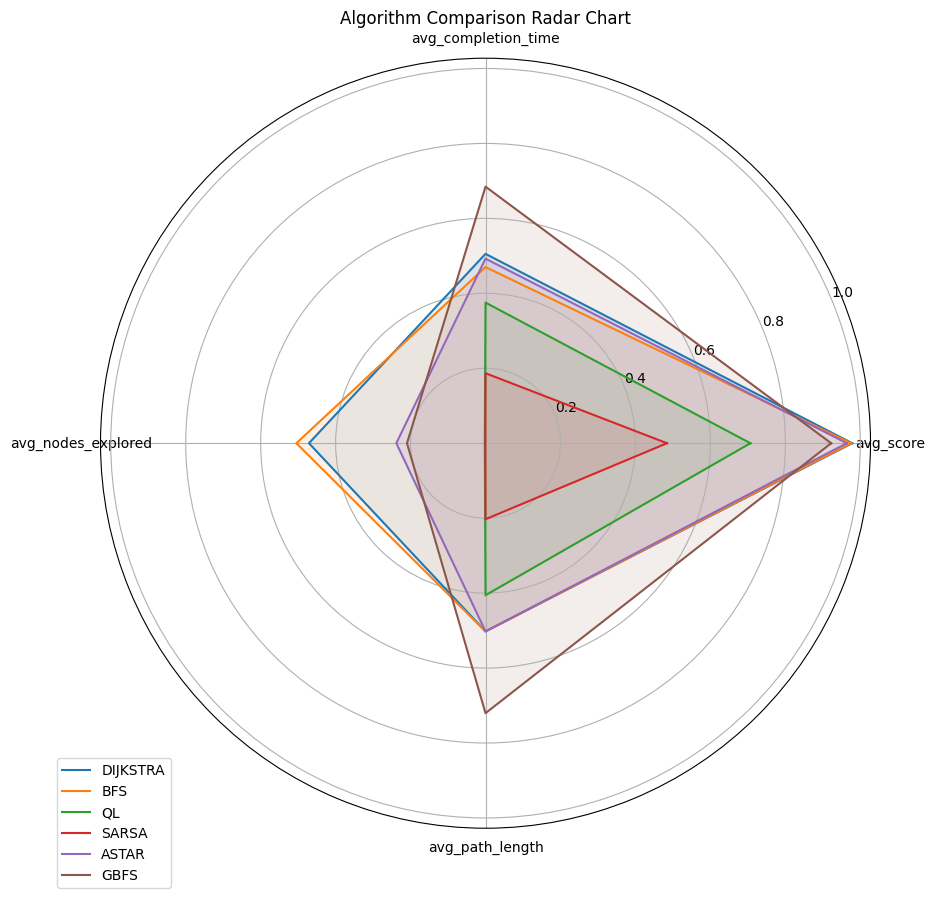

In [6]:
# Step 6: Comparative Analysis Visualization
plt.figure(figsize=(15, 12))

# Create a radar chart for comparing algorithms
metrics = ['avg_score', 'avg_completion_time', 'avg_nodes_explored', 'avg_path_length']
algorithms = df['algorithm'].unique()

# Normalize the data for radar chart
normalized_data = {}
for metric in metrics:
    normalized_data[metric] = (df[metric] - df[metric].min()) / (df[metric].max() - df[metric].min())

# Plot radar chart
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # complete the circle

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

for algo in algorithms:
    values = [normalized_data[metric][df['algorithm'] == algo].mean() for metric in metrics]
    values = np.concatenate((values, [values[0]]))
    ax.plot(angles, values, label=algo)
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Algorithm Comparison Radar Chart")
plt.show()